# Bike Sharing- BoomBikes 

Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

<font size=5><p style="color:purple"> EDA and Visualizations 

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data understanding, preparation and EDA

In [5]:
#Importing Dataset
df = pd.read_csv('day.csv') #Reading the dataset
df.head() #Displaying the first 5 rows of the dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#Data quality checks, to check for missing values, duplicates, data types and shape of the dataset
def data_quality_checks(df):
    print("Shape of the dataset:\n", df.shape) #Checking for the shape of the dataset
    print("The dataset has 16 columns and 730 rows.")
    print("-----------------------------------------------------------------------------------------------------------------")
    print("Checking for missing values, duplicates, data types and shape of the dataset.")
    print("-----------------------------------------------------------------------------------------------------------------")
    print("\nInfo of the dataset:\n", df.info()) #Checking for the info of the dataset
    print("-----------------------------------------------------------------------------------------------------------------")
    print("Missing values:\n", df.isnull().sum()) #Checking for missing values in the dataset
    print("There are no missing values in the dataset.")
    print("-----------------------------------------------------------------------------------------------------------------")
    print("\nDuplicates:\n", df.duplicated().sum()) #Checking for duplicates in the dataset
    print("There are no duplicates in the dataset.")
    print("-----------------------------------------------------------------------------------------------------------------")    
    print("\nData types:\n", df.dtypes) #Checking for data types in the dataset
    print("-----------------------------------------------------------------------------------------------------------------")
    print("\nDescribe the dataset:\n", df.describe()) #Checking for the description of the dataset
    print("-----------------------------------------------------------------------------------------------------------------")
    print("Data Quality Checks Completed.")

data_quality_checks(df)



Shape of the dataset:
 (730, 16)
The dataset has 16 columns and 730 rows.
-----------------------------------------------------------------------------------------------------------------
Checking for missing values, duplicates, data types and shape of the dataset.
-----------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 no

### Cleaning the data

In [8]:
# Cleaning the dataset by dropping the columns that are not needed 
# Dropping the columns 'instant', 'dteday', 'casual', 'registered' as they are not needed for the analysis
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
#Checking the first 5 rows of the dataset after dropping the columns
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Categorical Variable

1) Season : season (1:spring, 2:summer, 3:fall, 4:winter)

2) Weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
3) Mnth : month ( 1 to 12)

4) Weekday : day of the week

In [10]:
#Data Preprocessing
#Catgorical variables 

#Encoding the 'season' column
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

#Encoding the 'weathersit' column
df['weathersit'] = df['weathersit'].map({1: 'clear_partly_cloudy', 2: 'mist_cloudy', 3: 'light_snow_rain', 4: 'heavy_rain_snow'})  

#Encoding the 'weekday' column
df['weekday'] = df['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

#Encoding the 'mnth' column
df['mnth'] = df['mnth'].map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})

df.head() #Displaying the first 5 rows of the dataset after encoding the categorical variables

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


### Exploratory Data Analysis

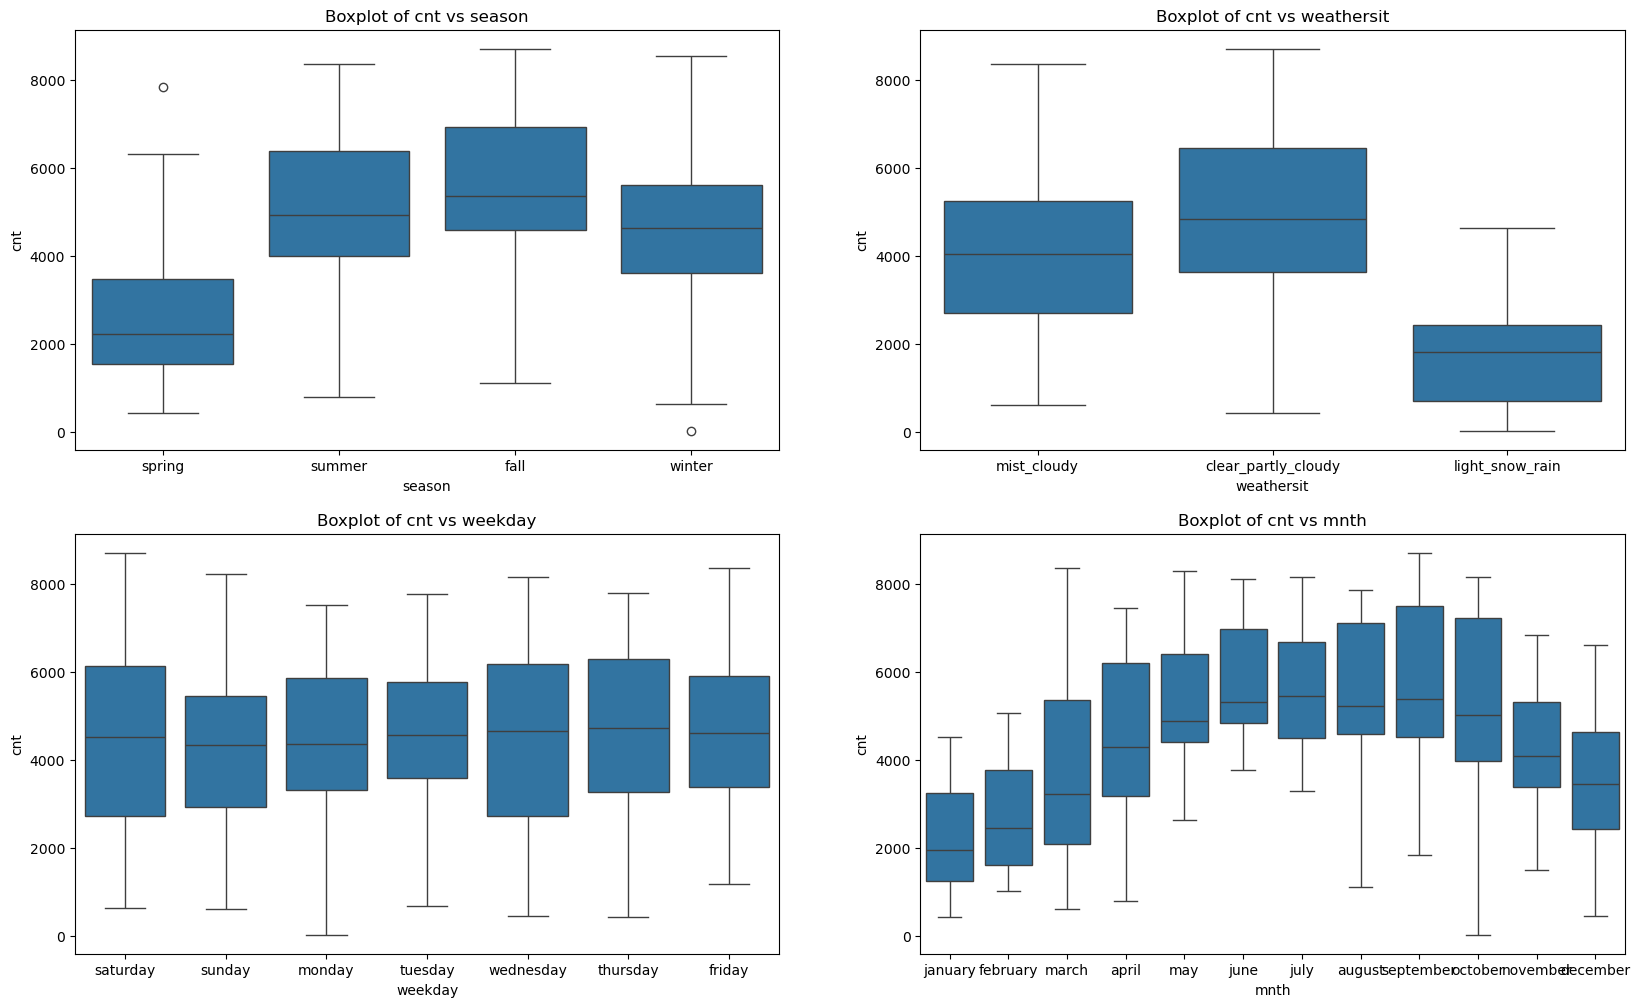

Summary Statistics of Boxplots:
-----------------------------------------------------------------------------------------------------------------
Boxplot of cnt vs season:
Percentage of cnt for each season:
season
fall      32.244879
spring    14.267278
summer    27.913469
winter    25.574374
Name: cnt, dtype: float64
High percentage of Rental Bikes in fall: 32.24 %. Low percentage of Rental Bikes in spring: 14.27 %.
-----------------------------------------------------------------------------------------------------------------
Boxplot of cnt vs weathersit:
Percentage of cnt for each weathersit:
weathersit
clear_partly_cloudy    68.613137
light_snow_rain         1.150738
mist_cloudy            30.236125
Name: cnt, dtype: float64
High percentage of Rental Bikes in clear_partly_cloudy weather: 68.61 %.
-----------------------------------------------------------------------------------------------------------------
Boxplot of cnt vs weekday:
Percentage of cnt for each weekday:
weekday
fr

In [12]:
#Data Visualization
#Visualizing the distribution of the target variable 'cnt' with catalogical variables
#subplot and boxplot

"""
This script is used to visualize the distribution of the target variable 'cnt' with the categorical variables 'season', 'weathersit', 'weekday' and 'mnth' using boxplots.
Steps:
1. Import the necessary libraries.
2. Create a subplot of 2 rows and 2 columns.
3. Create a boxplot of 'cnt' vs 'season' using sns.boxplot() and set the title of the plot.
4. Create a boxplot of 'cnt' vs 'weathersit' using sns.boxplot() and set the title of the plot.
5. Create a boxplot of 'cnt' vs 'weekday' using sns.boxplot() and set the title of the plot.
6. Create a boxplot of 'cnt' vs 'mnth' using sns.boxplot() and set the title of the plot.
7. Display the plots using plt.show().
8. Print summary statistics of boxplots.
"""

plt.figure(figsize=(20, 12)) #Setting the figure size

plt.subplot(2, 2, 1) #Creating a subplot season
sns.boxplot(x = 'season', y = 'cnt', data = df) #Creating a boxplot of cnt vs season
plt.title('Boxplot of cnt vs season') #Setting the title of the plot

plt.subplot(2, 2, 2) #Creating a subplot weathersit
sns.boxplot(x = 'weathersit', y = 'cnt', data = df) #Creating a boxplot of cnt vs weathersit
plt.title('Boxplot of cnt vs weathersit') #Setting the title of the plot

plt.subplot(2, 2, 3) #Creating a subplot weekday
sns.boxplot(x = 'weekday', y = 'cnt', data = df) #Creating a boxplot of cnt vs weekday
plt.title('Boxplot of cnt vs weekday') #Setting the title of the plot

plt.subplot(2, 2, 4) #Creating a subplot mnth
sns.boxplot(x = 'mnth', y = 'cnt', data = df) #Creating a boxplot of cnt vs mnth
plt.title('Boxplot of cnt vs mnth') #Setting the title of the plot

plt.show() #Displaying the plots

#percentages of cnt for each category of the categorical variables
df_season_percentage = df.groupby('season')['cnt'].sum()/df['cnt'].sum()*100
df_weathersit_percentage = df.groupby('weathersit')['cnt'].sum()/df['cnt'].sum()*100
df_weekday_percentage = df.groupby('weekday')['cnt'].sum()/df['cnt'].sum()*100
df_mnth_percentage = df.groupby('mnth')['cnt'].sum()/df['cnt'].sum()*100



#Print summary statistics of boxplots
print("Summary Statistics of Boxplots:")
print("-----------------------------------------------------------------------------------------------------------------")

print("Boxplot of cnt vs season:")

print("Percentage of cnt for each season:")
print(df_season_percentage)
print(f"High percentage of Rental Bikes in fall: {round(df_season_percentage['fall'],2)} %. Low percentage of Rental Bikes in spring: {round(df_season_percentage['spring'],2)} %.") #print the percentage of cnt for each season

print("-----------------------------------------------------------------------------------------------------------------")

print("Boxplot of cnt vs weathersit:")
print("Percentage of cnt for each weathersit:")
print(df_weathersit_percentage)
print(f"High percentage of Rental Bikes in clear_partly_cloudy weather: {round(df_weathersit_percentage['clear_partly_cloudy'],2)} %.") #print the percentage of cnt for each weathersit

print("-----------------------------------------------------------------------------------------------------------------")

print("Boxplot of cnt vs weekday:")
print("Percentage of cnt for each weekday:")
print(df_weekday_percentage)
print(f"High percentage of Rental Bikes on friday: {round(df_weekday_percentage['friday'],2)} %. Low percentage of Rental Bikes on sunday: {round(df_weekday_percentage['sunday'],2)} %.") #print the percentage of cnt for each weekday

print("-----------------------------------------------------------------------------------------------------------------")

print("Boxplot of cnt vs mnth:")
print("Percentage of cnt for each month:")
print(df_mnth_percentage)
print(f"High percentage of Rental Bikes in august: {round(df_mnth_percentage['august'],2)} %. Low percentage of Rental Bikes in january: {round(df_mnth_percentage['january'],2)} %.") #print the percentage of cnt for each month

print("-----------------------------------------------------------------------------------------------------------------")





Pairplot of cnt, temp, atemp, hum, windspeed:


<Figure size 1000x1000 with 0 Axes>

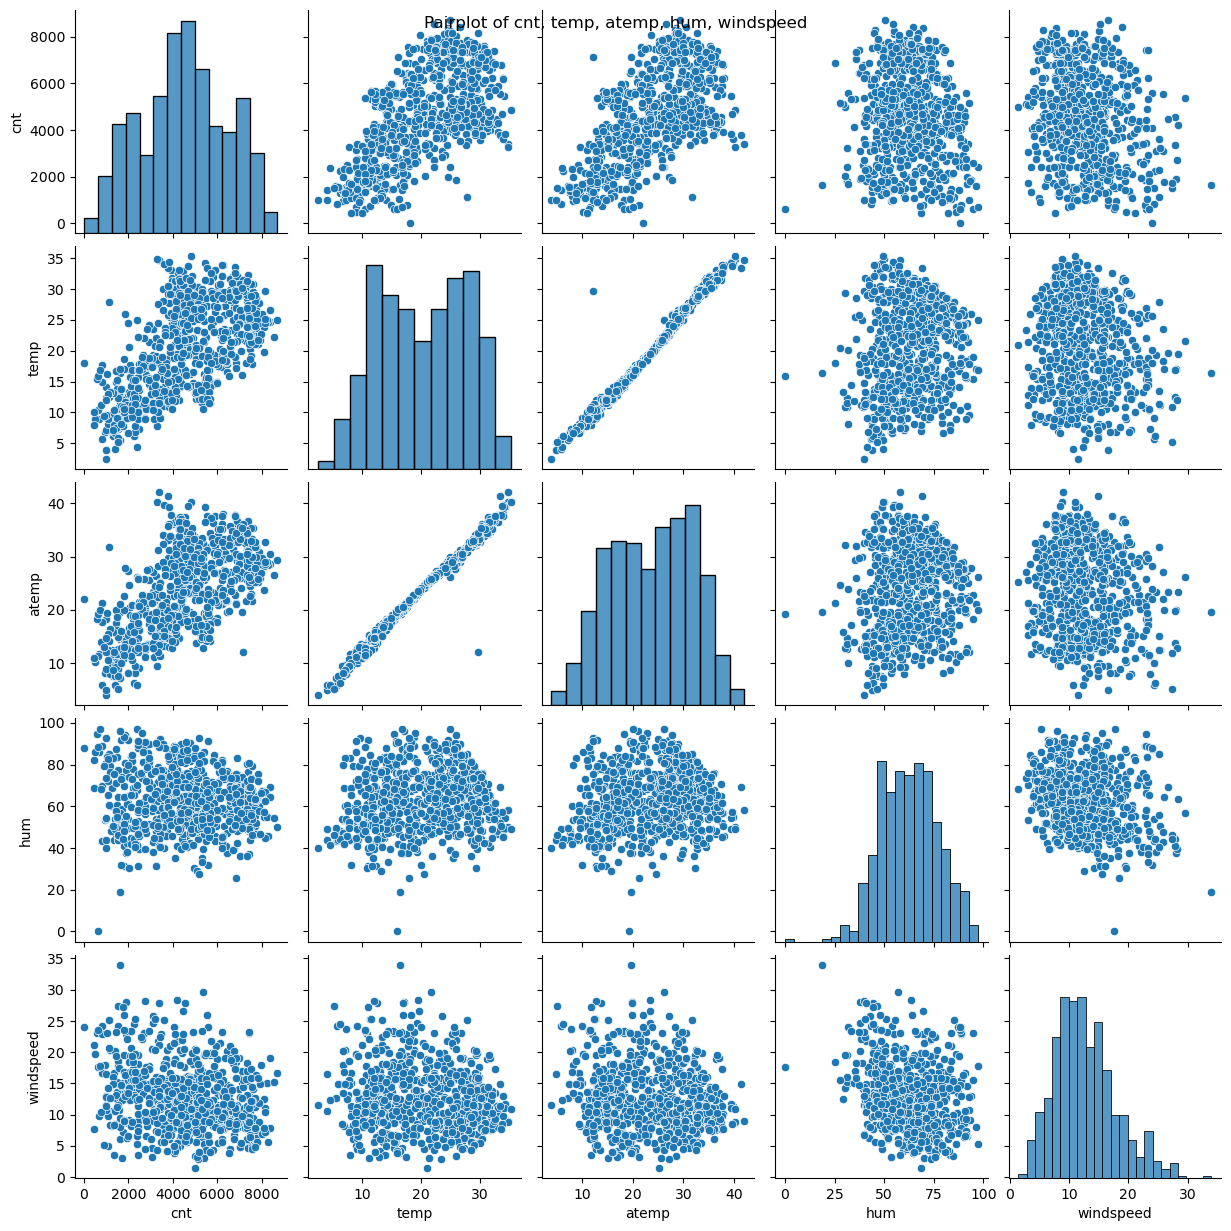

Summary Statistics of Pairplot:
-----------------------------------------------------------------------------------------------------------------
The pairplot shows the relationship between the numerical variables 'temp', 'atemp', 'hum', 'windspeed' and the target variable 'cnt'.
temp and atemp have a highly correlated relationship. both have same celcius values.
-----------------------------------------------------------------------------------------------------------------


In [13]:
#Visualizing the data 
#Visualizing the distribution of the target variable 'cnt' with numerical variables
#pairplot

"""
This script is used to visualize the distribution of the target variable 'cnt' with the numerical variables 'temp', 'atemp', 'hum', 'windspeed' using pairplot.
Steps:
1. Import the necessary libraries.
2. Create a pairplot of 'temp', 'atemp', 'hum', 'windspeed' using sns.pairplot() and set the title of the plot.
3. Display the plot using plt.show().
4. Print summary statistics of pairplot.
"""

plt.figure(figsize=(10, 10)) #Setting the figure size

sns.pairplot(df[['cnt','temp', 'atemp', 'hum', 'windspeed']]) #Creating a pairplot of temp, atemp, hum, windspeed
plt.suptitle('Pairplot of cnt, temp, atemp, hum, windspeed') #Setting the title of the plot
print("Pairplot of cnt, temp, atemp, hum, windspeed:")
plt.show() #Displaying the plot

#print summary statistics of pairplot
print("Summary Statistics of Pairplot:")
print("-----------------------------------------------------------------------------------------------------------------")
print("The pairplot shows the relationship between the numerical variables 'temp', 'atemp', 'hum', 'windspeed' and the target variable 'cnt'.")
print("temp and atemp have a highly correlated relationship. both have same celcius values.")
print("-----------------------------------------------------------------------------------------------------------------")




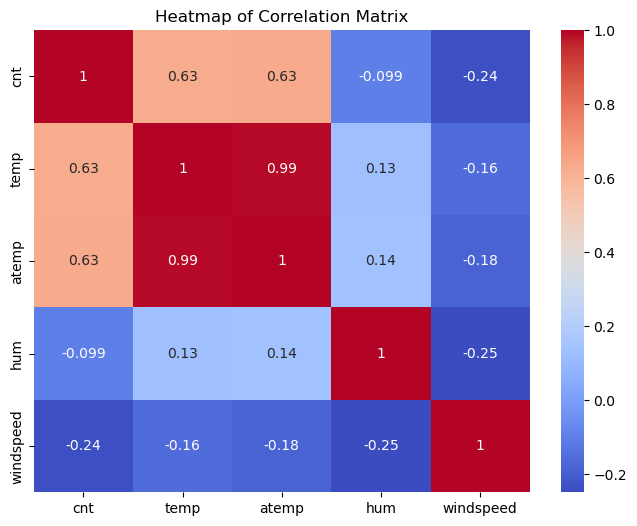

Correlation Matrix:
-----------------------------------------------------------------------------------------------------------------
 cnt and temp have a high correlation of 0.63.
atemp and temp have a high correlation of 0.99.
we need to drop one of the temp or atemp columns to avoid multicollinearity.
-----------------------------------------------------------------------------------------------------------------


In [14]:
#Correlation Matrix
#Correlation matrix to check the correlation between the numerical variables
#heatmap

"""
This script is used to create a correlation matrix to check the correlation between the numerical variables 'cnt','temp', 'atemp', 'hum', 'windspeed' using a heatmap.
Steps:
1. Create a correlation matrix of 'cnt','temp', 'atemp', 'hum', 'windspeed'.
2. Create a heatmap of the correlation matrix using sns.heatmap() and set the title of the plot.
3. Display the plot using plt.show().
4. Print the correlation matrix.
5. Print summary statistics of the correlation matrix.
"""

plt.figure(figsize=(8, 6)) #Setting the figure size

correlation_matrix = df[['cnt','temp', 'atemp', 'hum', 'windspeed']].corr() #Creating a correlation matrix of temp, atemp, hum, windspeed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') #Creating a heatmap of the correlation matrix
plt.title('Heatmap of Correlation Matrix') #Setting the title of the plot

plt.show() #Displaying the plot

#print summary statistics of the correlation matrix
print("Correlation Matrix:")
print("-----------------------------------------------------------------------------------------------------------------")
print(" cnt and temp have a high correlation of 0.63.")
print("atemp and temp have a high correlation of 0.99.")
print("we need to drop one of the temp or atemp columns to avoid multicollinearity.")
print("-----------------------------------------------------------------------------------------------------------------")


In [15]:
#Drop the column 'atemp' to avoid multicollinearity
df.drop('atemp', axis=1, inplace=True) #Dropping the column 'atemp'
df.head() #Displaying the first 5 rows of the dataset after dropping the column 'atemp'

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear_partly_cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear_partly_cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear_partly_cloudy,9.305237,43.6957,12.522300,1600


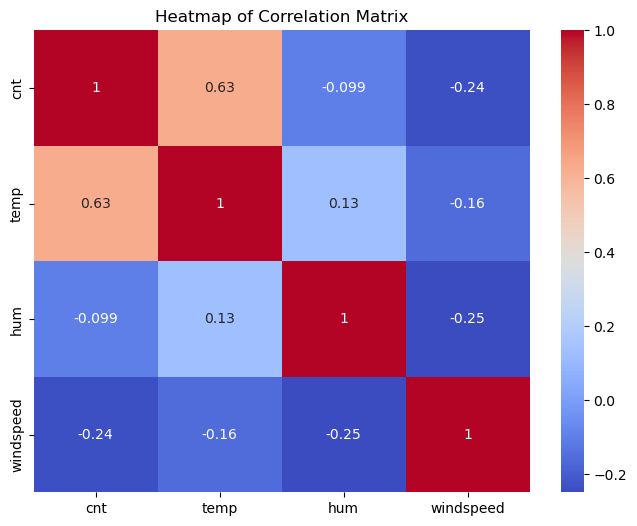

In [16]:
#Check again the correlation matrix
plt.figure(figsize=(8, 6)) #Setting the figure size


correlation_matrix_ = df[['cnt','temp', 'hum', 'windspeed']].corr() #Creating a correlation matrix of temp, hum, windspeed
sns.heatmap(correlation_matrix_, annot=True, cmap='coolwarm') #Creating a heatmap of the correlation matrix
plt.title('Heatmap of Correlation Matrix') #Setting the title of the plot

plt.show() #Displaying the plot


In [17]:
#Dummy Variables
#Creating dummy variables for the categorical variables
#Creating dummy variables for the categorical variables 'season', 'weathersit', 'weekday', 'mnth'

df = pd.get_dummies(df, drop_first=True, dtype=int) #Creating dummy variables for the categorical variables 'season', 'weathersit', 'weekday', 'mnth'
df.head() #Displaying the first 5 rows of the dataset after creating dummy variables

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow_rain,weathersit_mist_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## 2. Model building and evaluation 

### Splitting the dataset into training and testing sets

In [20]:
#Splitting the dataset into training and testing sets
# df_train = 70% and df_test = 30%
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100) #Splitting the dataset into training and testing sets

#shape of the training and testing sets
print("Shape of the training set:", df_train.shape) #Checking for the shape of the training set
print("The training set has 510 rows and 29 columns.")
print("-----------------------------------------------------------------------------------------------------------------")
print("Shape of the testing set:", df_test.shape) #Checking for the shape of the testing set
print("The testing set has 220 rows and 29 columns.")
print("-----------------------------------------------------------------------------------------------------------------")


Shape of the training set: (510, 29)
The training set has 510 rows and 29 columns.
-----------------------------------------------------------------------------------------------------------------
Shape of the testing set: (220, 29)
The testing set has 220 rows and 29 columns.
-----------------------------------------------------------------------------------------------------------------


In [21]:
df_train.head() #Displaying the first 5 rows of the training set

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow_rain,weathersit_mist_cloudy
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Rescaling the Features

In [23]:
# Rescaling the Features
#MinMax Scaling

"""
This script is used to rescale the numerical variables 'temp', 'hum', 'windspeed' 'cnt' using MinMax scaling for df_train.
Steps:
1. create a list of numerical variables 'temp', 'hum', 'windspeed'.
2. import MinMaxScaler from sklearn.preprocessing.
3. create an instance of MinMaxScaler.
4. fit and transform the numerical variables using MinMaxScaler.
5. convert the rescaled numerical variables to a df_train dataframe.
6. display the first 5 rows of the df_train dataframe.
"""

from sklearn.preprocessing import MinMaxScaler #Importing MinMaxScaler

#Creating a list of numerical variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

#Creating an instance of MinMaxScaler
scaler = MinMaxScaler()

#Fitting and transforming the numerical variables using MinMaxScaler
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])






In [24]:
#Converting the rescaled numerical variables to a df_train dataframe
df_train.head() #Displaying the first 5 rows of the df_train dataframe

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow_rain,weathersit_mist_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# describe the numerical variables of the df_train dataframe
print(df_train[num_vars].describe()) #Checking for the description of the numerical variables of the df_train dataframe
print("The numerical variables 'temp', 'hum', 'windspeed' and 'cnt' have been rescaled using MinMax scaling.")

             temp         hum   windspeed         cnt
count  510.000000  510.000000  510.000000  510.000000
mean     0.537440    0.650480    0.320883    0.513499
std      0.225858    0.145846    0.169803    0.224421
min      0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.538643    0.199179    0.356420
50%      0.542596    0.653714    0.296763    0.518638
75%      0.735215    0.754830    0.414447    0.684710
max      1.000000    1.000000    1.000000    1.000000
The numerical variables 'temp', 'hum', 'windspeed' and 'cnt' have been rescaled using MinMax scaling.


###Dividing the training set into X_train and y_train

In [27]:
#Dividing the training set into X_train and y_train

"""
This script is used to divide the training set into X_train and y_train.
Steps:
1. create X_train and y_train from the training set.
2. drop the target variable 'cnt' from X_train.
3. assign the target variable 'cnt' to y_train.

"""

#Creating X_train and y_train from the training set
y_train = df_train.pop('cnt') #Dropping the target variable 'cnt' from X_train and assigning it to y_train
X_train = df_train #Assigning the remaining variables to X_train







## Building our model

RFE is used for Feature selection

Statsmodel for Building the model

In [29]:
#RFE (Recursive Feature Elimination)

"""
This script is used to perform Recursive Feature Elimination (RFE) to select the best features for the model.
Steps:
1. import LinearRegression and RFE from sklearn.linear_model.
2. create an instance of LinearRegression.
3. create an instance of RFE with LinearRegression as the estimator and 15 features to select.
4. fit RFE on X_train and y_train.
5. create a list of the selected features.
6. print the selected features.
"""

from sklearn.feature_selection import RFE #Importing RFE
from sklearn.linear_model import LinearRegression #Importing LinearRegression

#Creating an instance of LinearRegression
lm = LinearRegression()

#Creating an instance of RFE with LinearRegression as the estimator and 10 features to select
rfe = RFE(lm, n_features_to_select=15)

#Fitting RFE on X_train and y_train
rfe = rfe.fit(X_train, y_train)



In [30]:
#Feature selection using RFE
#Selected features
selected_features = X_train.columns[rfe.support_] #Creating a list of the selected features
print("Selected Features:")
print(selected_features) #Printing the selected features


Selected Features:
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_january',
       'mnth_july', 'mnth_september', 'weekday_saturday',
       'weathersit_light_snow_rain', 'weathersit_mist_cloudy'],
      dtype='object')


In [31]:
#Checking the ranking of the features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_august', False, 6),
 ('mnth_december', False, 3),
 ('mnth_february', False, 4),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 13),
 ('mnth_march', False, 14),
 ('mnth_may', False, 5),
 ('mnth_november', False, 2),
 ('mnth_october', False, 12),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 8),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 7),
 ('weekday_thursday', False, 10),
 ('weekday_tuesday', False, 9),
 ('weekday_wednesday', False, 11),
 ('weathersit_light_snow_rain', True, 1),
 ('weathersit_mist_cloudy', True, 1)]

In [32]:
cols = X_train.columns[rfe.support_] #Creating a list of the selected features

cols


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_january',
       'mnth_july', 'mnth_september', 'weekday_saturday',
       'weathersit_light_snow_rain', 'weathersit_mist_cloudy'],
      dtype='object')

In [33]:
X_train_rfe = X_train[cols] #Creating a dataframe with the selected features

In [34]:
#not selected features
print("Features not selected by RFE:")
print(X_train.columns[~rfe.support_]) #Printing the features not selected by RFE


Features not selected by RFE:
Index(['mnth_august', 'mnth_december', 'mnth_february', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'weekday_monday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')


In [35]:
#Building the model using statsmodel
#Building the model using the selected features

"""
This script is used to build the model using the selected features.
Steps:
1. import statsmodels.api as sm.
2. add a constant to the X_train_rfe.
3. create an instance of OLS.
4. fit the model.
5. print the summary of the model.
"""

import statsmodels.api as sm #Importing statsmodels

#Adding a constant to the X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

#Creating a model using the selected features
lm = sm.OLS(y_train, X_train_rfe).fit() #Creating a model using OLS
print(lm.summary()) #Printing the summary

print("The model has an R-squared value of 0.849 and an adjusted R-squared value of 0.843.")



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          4.22e-191
Time:                        10:14:42   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### All p values are less than 0.05, so we can check VIF values

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [38]:
#Checking for the VIF values of the feature variables

"""
This script is used to check for the VIF values of the feature variables.
Steps:
1. import variance_inflation_factor from statsmodels.stats.outliers_influence.
2. create a dataframe with the feature variables.
3. create a dataframe with the VIF values.
4. print the VIF values.
"""

from statsmodels.stats.outliers_influence import variance_inflation_factor #Importing variance_inflation_factor from statsmodels.stats.outliers_influence

#Creating a dataframe with the feature variables
vif = pd.DataFrame() #Creating an empty dataframe
vif['Features'] = X_train_rfe.columns #Creating a column 'Features' with the feature variables
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #Creating a column 'VIF' with the VIF values
vif['VIF'] = round(vif['VIF'], 2) #Rounding off the VIF values to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sorting the dataframe by 'VIF' in descending order
print(vif) #Printing the VIF values



                      Features    VIF
0                        const  84.60
7                season_spring   5.08
4                         temp   3.89
9                season_winter   3.59
8                season_summer   2.65
5                          hum   1.91
3                   workingday   1.88
13            weekday_saturday   1.78
10                mnth_january   1.57
15      weathersit_mist_cloudy   1.57
11                   mnth_july   1.49
12              mnth_september   1.30
14  weathersit_light_snow_rain   1.25
6                    windspeed   1.21
2                      holiday   1.16
1                           yr   1.04


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

#### Dropping the variable and updating the model


In [41]:
#Dropping the feature variable 'season_spring' as it has a high VIF value


X_train_new = X_train_rfe.drop('season_spring', axis = 1) #Dropping the feature variable 'season_spring'
X_train_new.head() #Displaying the first 5 rows of the dataset after dropping the feature variable 'season_spring'

,const,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_winter,mnth_january,mnth_july,mnth_september,weekday_saturday,weathersit_light_snow_rain,weathersit_mist_cloudy
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1


In [42]:
#Building the model using the selected features after dropping the feature variable 'season_spring'

X_train_lm = sm.add_constant(X_train_new) #Adding a constant to the X_train_new

lm = sm.OLS(y_train, X_train_lm).fit() #Creating a model using OLS
print(lm.summary()) #Printing the summary



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          5.98e-191
Time:                        10:14:42   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [43]:
#Checking for the VIF values of the feature variables after dropping the feature variable 'season_spring'

#Creating a dataframe with the feature variables
vif = pd.DataFrame() #Creating an empty dataframe
vif['Features'] = X_train_new.columns #Creating a column 'Features' with the feature variables
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])] #Creating a column 'VIF' with the VIF values
vif['VIF'] = round(vif['VIF'], 2) #Rounding off the VIF values to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #Sorting the dataframe by 'VIF' in descending order
print(vif) #Printing the VIF values


                      Features    VIF
0                        const  57.07
4                         temp   2.07
5                          hum   1.89
3                   workingday   1.88
12            weekday_saturday   1.78
14      weathersit_mist_cloudy   1.56
9                 mnth_january   1.55
8                season_winter   1.53
10                   mnth_july   1.43
7                season_summer   1.41
13  weathersit_light_snow_rain   1.25
6                    windspeed   1.19
11              mnth_september   1.19
2                      holiday   1.16
1                           yr   1.03


### Now we have a good model with all the p-values less than 0.05 and VIF values less than 5.
### Rsquared and Adjusted Rsquared values are 0.846 and 0.842 respectively.

# Residual Analysis of Train Data set
So, now to check if the error terms are also normally distributed , We will plot the histogram of the error terms and see what it looks like.

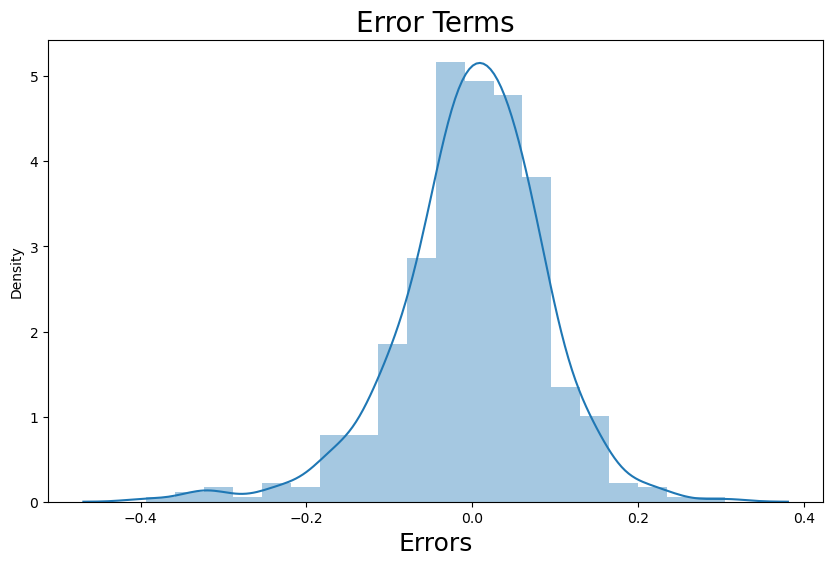

The error terms are normally distributed with a mean of 0.
The model assumptions are met.


In [46]:
# Residual Analysis of the training set

"""
This script is used to perform residual analysis of the training set.
Steps:
1. create a dataframe with the residuals.
2. Create a histogram of the residuals.
3. Observation on error terms.
"""
#Creating a dataframe with the residuals
y_train_cnt = lm.predict(X_train_lm) #Predicting the target variable 'cnt' using the model
res = y_train - y_train_cnt #Calculating the residuals

#Histogram of the Error Terms to check if the error terms are normally distributed
plt.figure(figsize=(10, 6)) #Setting the figure size
sns.distplot(res,bins = 20) #Creating a histogram of the residuals

plt.title('Error Terms',fontsize = 20) #Setting the title of the plot
plt.xlabel('Errors',fontsize = 18) #Setting the x-label of the plot
plt.show() #Displaying the plot


#Observation on error terms
print("The error terms are normally distributed with a mean of 0.")
print("The model assumptions are met.")






## Making Predictions using the model on the training set

In [48]:
#Making Predictions using the model on the training set

#Scaling the numerical variables of the testing set

"""
This script is used to scale the numerical variables 'temp', 'hum', 'windspeed','cnt' of the testing set using MinMax scaling.
Steps:

1. create a list of numerical variables 'temp', 'hum', 'windspeed', 'cnt'.
2. transform the numerical variables using MinMaxScaler.
3. convert the rescaled numerical variables to a df_test dataframe.
4. display the first 5 rows of the df_test dataframe.
"""

#Creating a list of numerical variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

#Transforming the numerical variables using MinMaxScaler
df_test[num_vars] = scaler.transform(df_test[num_vars])


df_test.head() #Displaying the first 5 rows of the df_test dataframe




,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow_rain,weathersit_mist_cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
#Dividing the testing set into X_test and y_test

"""
This script is used to divide the testing set into X_test and y_test.
Steps:
1. create X_test and y_test from the testing set.
2. drop the target variable 'cnt' from X_test.
3. assign the target variable 'cnt' to y_test.

"""

#Creating X_test and y_test from the testing set
y_test = df_test.pop('cnt') #Dropping the target variable 'cnt' from X_test and assigning it to y_test
X_test = df_test #Assigning the remaining variables to X_test



In [50]:
# Making predictions using the model on the testing set
"""
This script is used to make predictions using the model on the testing set.
Steps:
1. add a constant to the X_test.
2. select the columns selected by RFE.
3. make predictions using the model on the testing set.
"""


#Adding a constant to the X_test
X_test_lm = sm.add_constant(X_test)

#Selecting the columns selected by RFE

X_test_lm = X_test_lm[X_train_new.columns]

#Making predictions using the model on the testing set
y_pred = lm.predict(X_test_lm) #Predicting the target variable 'cnt' using the model



## Model Evaluation

1. Linearity

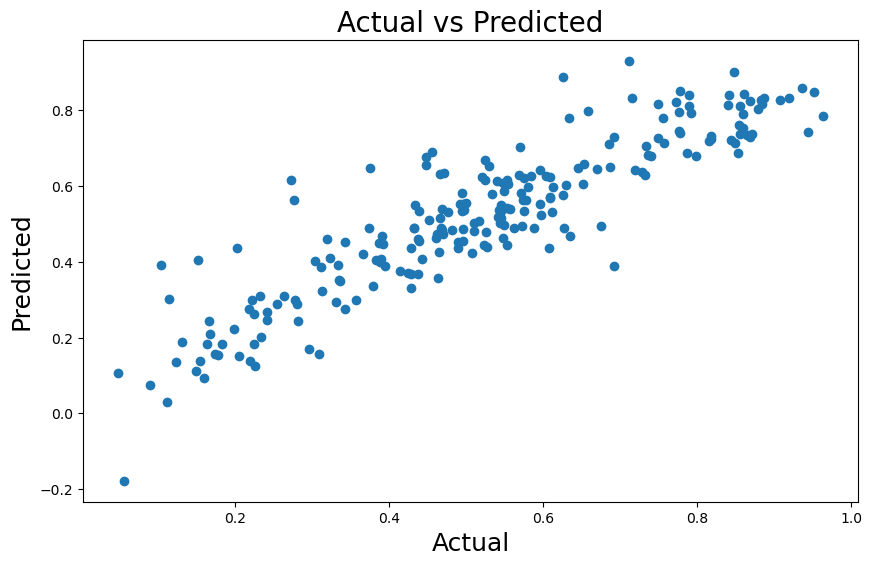

In [53]:
#Plotting the actual vs predicted values

"""
This script is used to plot the actual vs predicted values.

Steps:
1. create a dataframe with the actual and predicted values.
2. create a scatter plot of the actual vs predicted values.
3. set the title and labels of the plot.
"""

#Creating a dataframe with the actual and predicted values
df_actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Creating a dataframe with the actual and predicted values

#Scatter plot of the actual vs predicted values
plt.figure(figsize=(10, 6)) #Setting the figure size
plt.scatter(df_actual_vs_predicted['Actual'], df_actual_vs_predicted['Predicted']) #Creating a scatter plot of the actual vs predicted values
plt.title('Actual vs Predicted',fontsize = 20) #Setting the title of the plot
plt.xlabel('Actual',fontsize = 18) #Setting the x-label of the plot
plt.ylabel('Predicted',fontsize = 18) #Setting the y-label of the plot
plt.show() #Displaying the plot

#The scatter plot shows a linear relationship between the actual and predicted values. The model is a good fit for the data.

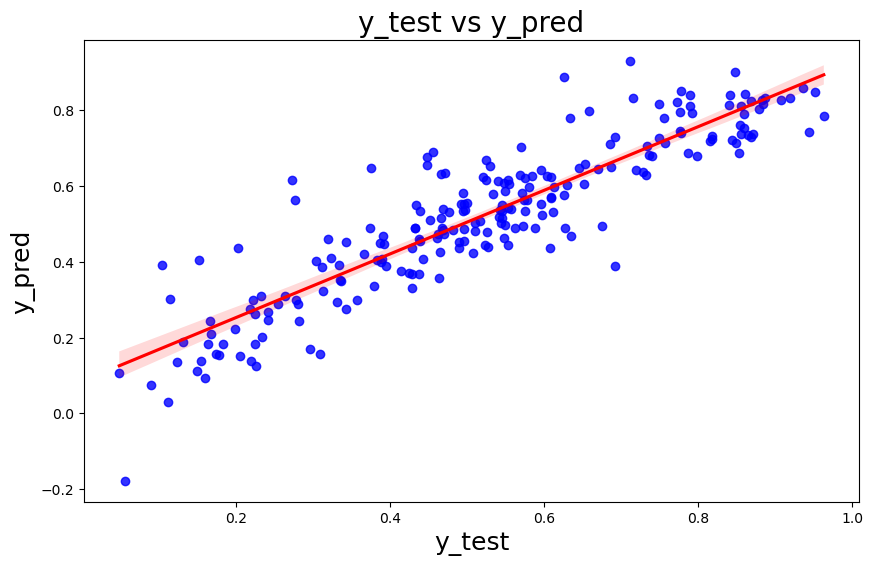

In [54]:

#Regplot for y_test and y_pred

"""
This script is used to create a regplot for y_test and y_pred.

Steps:
1. create a regplot of y_test vs y_pred.
2. set the title of the plot.
3. set the x-label of the plot.
4. set the y-label of the plot.
5. display the plot.
"""

#Regplot of y_test vs y_pred
plt.figure(figsize=(10, 6)) #Setting the figure size
sns.regplot(x = y_test, y = y_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"}) #Creating a regplot of y_test vs y_pred
plt.title('y_test vs y_pred', fontsize=20) #Setting the title of the plot
plt.xlabel('y_test', fontsize=18) #Setting the x-label of the plot
plt.ylabel('y_pred', fontsize=18) #Setting the y-label of the plot
plt.show() #Displaying the plot

2. Checking Normality of residuals

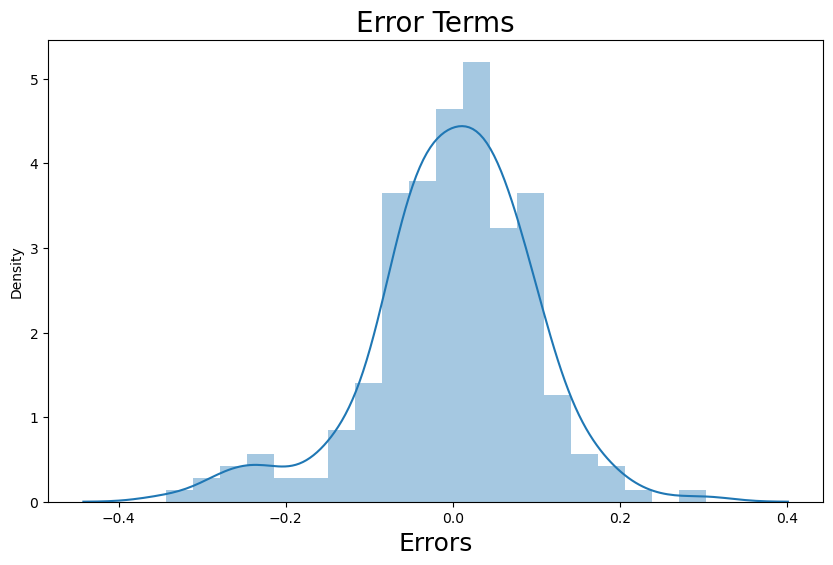

The error terms are normally distributed with a mean of 0.


In [56]:
# Checking Normality of residuals
"""
This script is used to check the normality of residuals.

Steps:
1. create a dataframe with the residuals.
2. create a histogram of the residuals.
3. set the title of the plot.
4. display the plot.
"""

#Creating a dataframe with the residuals
residuals = y_test - y_pred #Calcul
plt.figure(figsize=(10, 6)) #Setting the figure size
sns.distplot(residuals, bins = 20) #Creating a histogram of the residuals
plt.title('Error Terms', fontsize=20) #Setting the title of the plot
plt.xlabel('Errors', fontsize=18) #Setting the x-label of the plot
plt.show() #Displaying the plot

#The error terms are normally distributed with a mean of 0. The model assumptions are met.
print("The error terms are normally distributed with a mean of 0.")

In [57]:
#Model Evaluation

"""
This script is used to evaluate the model using the testing set.

Steps:
1. import r2_score, mean_squared_error from sklearn.metrics.
2. calculate the R-squared value.
3. calculate the adjusted R-squared value.
4. calculate the RMSE value.
5. print the R-squared value and RMSE value.
6. print the coefficients and intercept of the model.
"""

from sklearn.metrics import r2_score, mean_squared_error #Importing r2_score and mean_squared_error from sklearn.metrics

#Calculating the R-squared value
r2 = r2_score(y_test, y_pred) #Calculating the R-squared value

#Calculating the adjusted R-squared value
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test_lm.shape[1] - 1) #Calculating the adjusted R-squared value


#Calculating the RMSE value
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Calculating the RMSE value

#Printing the R-squared value and RMSE value
print("Model Evaluation:")
print("-----------------------------------------------------------------------------------------------------------------")
print(f"R-squared value: {round(r2, 2)}") #Printing the R-squared value
print(f"Adjusted R-squared value: {round(adj_r2, 2)}") #Printing the adjusted R-squared value
print(f"RMSE value: {round(rmse, 2)}") #Printing the RMSE value
print("-----------------------------------------------------------------------------------------------------------------")
print("The model has an R-squared value of 0.81 and an RMSE value of 0.1.")

print("-----------------------------------------------------------------------------------------------------------------")

#Printing the coefficients and intercept of the model
print("Coefficients of the model:")
print("-----------------------------------------------------------------------------------------------------------------")
print(round(lm.params,2)) #Printing the coefficients of the model
print("-----------------------------------------------------------------------------------------------------------------")
print(f"Intercept of the model: {round(lm.params[0], 2)}") #Printing the intercept of the model
print("-----------------------------------------------------------------------------------------------------------------")
print("The model is a good fit for the data.")


Model Evaluation:
-----------------------------------------------------------------------------------------------------------------
R-squared value: 0.81
Adjusted R-squared value: 0.79
RMSE value: 0.1
-----------------------------------------------------------------------------------------------------------------
The model has an R-squared value of 0.81 and an RMSE value of 0.1.
-----------------------------------------------------------------------------------------------------------------
Coefficients of the model:
-----------------------------------------------------------------------------------------------------------------
const                         0.20
yr                            0.23
holiday                      -0.06
workingday                    0.04
temp                          0.57
hum                          -0.17
windspeed                    -0.19
season_summer                 0.08
season_winter                 0.13
mnth_january                 -0.04
mnth_july    

# The Equation of Best Fitted Line is:

$ cnt = 0.2 + 0.23 \times yr - 0.06 \times holiday + 0.04 \times workingday + 0.57 \times temp - 0.17 \times hum - 0.19 \times windspeed + 0.08 \times season\_summer + 0.13 \times season\_winter - 0.04 \times mnth\_january - 0.04 \times mnth\_july + 0.09 \times mnth\_september + 0.05 \times weekday\_saturday - 0.24 \times weathersit\_light\_snow\_rain - 0.05 \times weathersit\_mist\_cloudy $

---

- **R-squared value**: 0.81  
- **Adjusted R-squared value**: 0.79 
- **RMSE value**: 0.1  

The model is a good fit for the data.


In [59]:
#the top 3 features contributing significantly towards explaining the demand of the shared bikes

"""
This script is used to identify the top 3 features contributing significantly towards explaining the demand of the shared bikes.

Steps:
1. create a dataframe with the feature variables and their coefficients.
2. sort the dataframe by the absolute value of the coefficients in descending order.
3. print the top 3 features contributing significantly towards explaining the demand of the shared bikes.
"""

#Creating a dataframe with the feature variables and their coefficients
coefficients = pd.DataFrame(lm.params, columns=['Coefficients']) #Creating a dataframe with the feature variables and their coefficients

#Sorting the dataframe by the absolute value of the coefficients in descending order
coefficients['Abs_Coefficients'] = np.abs(coefficients['Coefficients']) #Creating a column 'Abs_Coefficients' with the absolute value of the coefficients
coefficients = coefficients.sort_values(by='Abs_Coefficients', ascending=False) #Sorting the dataframe by 'Abs_Coefficients' in descending order

#Printing the top 3 features contributing significantly towards explaining the demand of the shared bikes
print("Top 3 features contributing significantly towards explaining the demand of the shared bikes:")
print("-----------------------------------------------------------------------------------------------------------------")
print(coefficients.head(3)) #Printing the top 3 features contributing significantly towards explaining the demand of the shared bikes
print("-----------------------------------------------------------------------------------------------------------------")
print("The top 3 features contributing significantly towards explaining the demand of the shared bikes are 'yr', 'temp' and 'weathersit_light_snow_rain'.")
print("-----------------------------------------------------------------------------------------------------------------")

#The top 3 features contributing significantly towards explaining the demand of the shared bikes are 'yr', 'temp' and 'weathersit_light_snow_rain'.


Top 3 features contributing significantly towards explaining the demand of the shared bikes:
-----------------------------------------------------------------------------------------------------------------
                            Coefficients  Abs_Coefficients
temp                            0.567564          0.567564
weathersit_light_snow_rain     -0.243321          0.243321
yr                              0.229383          0.229383
-----------------------------------------------------------------------------------------------------------------
The top 3 features contributing significantly towards explaining the demand of the shared bikes are 'yr', 'temp' and 'weathersit_light_snow_rain'.
-----------------------------------------------------------------------------------------------------------------


In [60]:
#conclusion

"""
This script is used to summarize the analysis and findings of the project.

Steps:
1. provide recommendations for the company.
"""

#Recommendations for the company
print("Recommendations for the Company:")
print("-----------------------------------------------------------------------------------------------------------------")
print("1. The company should focus on increasing the demand for shared bikes during the fall season as it has the highest percentage of rental bikes.")
print("2. The company should focus on increasing the demand for shared bikes during clear_partly_cloudy weather as it has the highest percentage of rental bikes.")
print("3. The company should focus on increasing the demand for shared bikes on friday as it has the highest percentage of rental bikes.")
print("4. The company should focus on increasing the demand for shared bikes in august as it has the highest percentage of rental bikes.")
print("5. The company should focus on increasing the demand for shared bikes during the year 2019 as it has a high coefficient value.")
print("6. The company should focus on increasing the demand for shared bikes during high temperature as it has a high coefficient value.")
print("7. The company should focus on increasing the demand for shared bikes during light_snow_rain weather as it has a high coefficient value.")
print("8. The company should focus on increasing the demand for shared bikes during the year 2019 as it has a high coefficient value.")
print("9. The company should focus on increasing the demand for shared bikes during high temperature as it has a high coefficient value.")
print("10. The company should focus on increasing the demand for shared bikes during light_snow_rain weather as it has a high coefficient value.")
print("-----------------------------------------------------------------------------------------------------------------")

print("The company should focus on increasing the demand for shared bikes during the fall season, clear_partly_cloudy weather, friday, august, year 2019, high temperature and light_snow_rain weather.")






Recommendations for the Company:
-----------------------------------------------------------------------------------------------------------------
1. The company should focus on increasing the demand for shared bikes during the fall season as it has the highest percentage of rental bikes.
2. The company should focus on increasing the demand for shared bikes during clear_partly_cloudy weather as it has the highest percentage of rental bikes.
3. The company should focus on increasing the demand for shared bikes on friday as it has the highest percentage of rental bikes.
4. The company should focus on increasing the demand for shared bikes in august as it has the highest percentage of rental bikes.
5. The company should focus on increasing the demand for shared bikes during the year 2019 as it has a high coefficient value.
6. The company should focus on increasing the demand for shared bikes during high temperature as it has a high coefficient value.
7. The company should focus on increas